# Aromaticity Detection

RMG relies solely on RDKit for aromaticity detection. After creating a molecule, we will convert it to an RDKit molecule, then query each of the bonds to determine if RDKit considers them aromatic. If a molecule has a six-membered ring (RMG constraint) and each of the six bonds are considered by RDKit to be aromatic, then RMG considers the ring to be aromatic.

Essentially, we assume that RDKit is always correct, which is not true. A notable example is when rings have double bonded substituents. Because RDKit uses an atom-centered counting method to perform a Huckel rule check, such molecules are considered aromatic. However, we don't think they should be. This notebook tests aromaticity perception by RDKit and Open Babel for such cases.

Interesting link: http://blueobelisk.shapado.com/questions/aromaticity-perception-differences

## RDKit

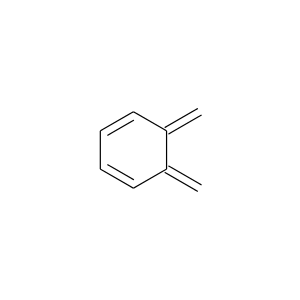

In [19]:
from rdkit import Chem
from rdkit.Chem import Draw

m = Chem.MolFromSmiles('C1(=C)C=CC=CC1=C')
Draw.MolToImage(m)

In [20]:
print 'Atoms\n====='
for atom in m.GetAtoms():
    print atom.GetIdx(), atom.GetSymbol(), atom.IsInRing(), atom.GetIsAromatic()

print 'Bonds\n====='
for bond in m.GetBonds():
    print bond.GetIdx(), bond.GetBondTypeAsDouble(), bond.GetIsAromatic()

Atoms
=====
0 C True True
1 C False False
2 C True True
3 C True True
4 C True True
5 C True True
6 C True True
7 C False False
Bonds
=====
0 2.0 False
1 1.5 True
2 1.5 True
3 1.5 True
4 1.5 True
5 1.5 True
6 2.0 False
7 1.5 True


## OpenBabel

http://python.zirael.org/e-openbabel8.html

In [21]:
import pybel

In [30]:
m2 = pybel.readstring('smi', 'C1(=C)C=CC=CC1=C')

print 'Atoms\n====='
for atom in m2.atoms:
    print atom.OBAtom.IsAromatic()

print 'Rings\n====='
for ring in m2.sssr:
    print ring.IsAromatic()

Atoms
=====
True
False
True
True
True
True
True
False
Rings
=====
True
